In [1]:
import os
import json
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

## Preparing the dataset

In [2]:
dataset_path="audio/Data/genres_original"
json_path="audio/Data/data.json"
SAMPLE_RATE = 22050  # one second of continuous signal is split to 22050 discrete points
TRACK_DURATION = 30 
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION # total number of samples per track

In [3]:
def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    # each track is split into 5 samples (we do this to increase the number of training data)
    data={
        "mapping":[],
        "mfcc":[],
        "labels":[]
    }
    
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)   # number of samples per segment
    num_mfcc_vectors_per_segment = np.ceil(samples_per_segment / hop_length) 
    
    for i,(dirpath,dirnames,filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            dirpath_components=dirpath.split("/")
            semantic_label=dirpath_components[-1]
            data["mapping"].append(semantic_label.split("genres_original")[1][1:])
            
            for f in filenames:
                file_path=os.path.join(dirpath,f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                
                for d in range(num_segments):
                    # each track is divided and the mfcc's are calculated
                    start = samples_per_segment * d
                    finish = start + samples_per_segment
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T
                    
                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))
                        

    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)                       

In [4]:
save_mfcc(dataset_path,json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5)

audio/Data/genres_original\blues\blues.00000.wav, segment:1
audio/Data/genres_original\blues\blues.00000.wav, segment:2
audio/Data/genres_original\blues\blues.00000.wav, segment:3
audio/Data/genres_original\blues\blues.00000.wav, segment:4
audio/Data/genres_original\blues\blues.00000.wav, segment:5
audio/Data/genres_original\blues\blues.00001.wav, segment:1
audio/Data/genres_original\blues\blues.00001.wav, segment:2
audio/Data/genres_original\blues\blues.00001.wav, segment:3
audio/Data/genres_original\blues\blues.00001.wav, segment:4
audio/Data/genres_original\blues\blues.00001.wav, segment:5
audio/Data/genres_original\blues\blues.00002.wav, segment:1
audio/Data/genres_original\blues\blues.00002.wav, segment:2
audio/Data/genres_original\blues\blues.00002.wav, segment:3
audio/Data/genres_original\blues\blues.00002.wav, segment:4
audio/Data/genres_original\blues\blues.00002.wav, segment:5
audio/Data/genres_original\blues\blues.00003.wav, segment:1
audio/Data/genres_original\blues\blues.0

audio/Data/genres_original\blues\blues.00028.wav, segment:5
audio/Data/genres_original\blues\blues.00029.wav, segment:1
audio/Data/genres_original\blues\blues.00029.wav, segment:2
audio/Data/genres_original\blues\blues.00029.wav, segment:3
audio/Data/genres_original\blues\blues.00029.wav, segment:4
audio/Data/genres_original\blues\blues.00029.wav, segment:5
audio/Data/genres_original\blues\blues.00030.wav, segment:1
audio/Data/genres_original\blues\blues.00030.wav, segment:2
audio/Data/genres_original\blues\blues.00030.wav, segment:3
audio/Data/genres_original\blues\blues.00030.wav, segment:4
audio/Data/genres_original\blues\blues.00030.wav, segment:5
audio/Data/genres_original\blues\blues.00031.wav, segment:1
audio/Data/genres_original\blues\blues.00031.wav, segment:2
audio/Data/genres_original\blues\blues.00031.wav, segment:3
audio/Data/genres_original\blues\blues.00031.wav, segment:4
audio/Data/genres_original\blues\blues.00031.wav, segment:5
audio/Data/genres_original\blues\blues.0

audio/Data/genres_original\blues\blues.00057.wav, segment:1
audio/Data/genres_original\blues\blues.00057.wav, segment:2
audio/Data/genres_original\blues\blues.00057.wav, segment:3
audio/Data/genres_original\blues\blues.00057.wav, segment:4
audio/Data/genres_original\blues\blues.00057.wav, segment:5
audio/Data/genres_original\blues\blues.00058.wav, segment:1
audio/Data/genres_original\blues\blues.00058.wav, segment:2
audio/Data/genres_original\blues\blues.00058.wav, segment:3
audio/Data/genres_original\blues\blues.00058.wav, segment:4
audio/Data/genres_original\blues\blues.00058.wav, segment:5
audio/Data/genres_original\blues\blues.00059.wav, segment:1
audio/Data/genres_original\blues\blues.00059.wav, segment:2
audio/Data/genres_original\blues\blues.00059.wav, segment:3
audio/Data/genres_original\blues\blues.00059.wav, segment:4
audio/Data/genres_original\blues\blues.00059.wav, segment:5
audio/Data/genres_original\blues\blues.00060.wav, segment:1
audio/Data/genres_original\blues\blues.0

audio/Data/genres_original\blues\blues.00084.wav, segment:4
audio/Data/genres_original\blues\blues.00084.wav, segment:5
audio/Data/genres_original\blues\blues.00085.wav, segment:1
audio/Data/genres_original\blues\blues.00085.wav, segment:2
audio/Data/genres_original\blues\blues.00085.wav, segment:3
audio/Data/genres_original\blues\blues.00085.wav, segment:4
audio/Data/genres_original\blues\blues.00085.wav, segment:5
audio/Data/genres_original\blues\blues.00086.wav, segment:1
audio/Data/genres_original\blues\blues.00086.wav, segment:2
audio/Data/genres_original\blues\blues.00086.wav, segment:3
audio/Data/genres_original\blues\blues.00086.wav, segment:4
audio/Data/genres_original\blues\blues.00086.wav, segment:5
audio/Data/genres_original\blues\blues.00087.wav, segment:1
audio/Data/genres_original\blues\blues.00087.wav, segment:2
audio/Data/genres_original\blues\blues.00087.wav, segment:3
audio/Data/genres_original\blues\blues.00087.wav, segment:4
audio/Data/genres_original\blues\blues.0

audio/Data/genres_original\classical\classical.00010.wav, segment:4
audio/Data/genres_original\classical\classical.00010.wav, segment:5
audio/Data/genres_original\classical\classical.00011.wav, segment:1
audio/Data/genres_original\classical\classical.00011.wav, segment:2
audio/Data/genres_original\classical\classical.00011.wav, segment:3
audio/Data/genres_original\classical\classical.00011.wav, segment:4
audio/Data/genres_original\classical\classical.00011.wav, segment:5
audio/Data/genres_original\classical\classical.00012.wav, segment:1
audio/Data/genres_original\classical\classical.00012.wav, segment:2
audio/Data/genres_original\classical\classical.00012.wav, segment:3
audio/Data/genres_original\classical\classical.00012.wav, segment:4
audio/Data/genres_original\classical\classical.00012.wav, segment:5
audio/Data/genres_original\classical\classical.00013.wav, segment:1
audio/Data/genres_original\classical\classical.00013.wav, segment:2
audio/Data/genres_original\classical\classical.0

audio/Data/genres_original\classical\classical.00036.wav, segment:2
audio/Data/genres_original\classical\classical.00036.wav, segment:3
audio/Data/genres_original\classical\classical.00036.wav, segment:4
audio/Data/genres_original\classical\classical.00036.wav, segment:5
audio/Data/genres_original\classical\classical.00037.wav, segment:1
audio/Data/genres_original\classical\classical.00037.wav, segment:2
audio/Data/genres_original\classical\classical.00037.wav, segment:3
audio/Data/genres_original\classical\classical.00037.wav, segment:4
audio/Data/genres_original\classical\classical.00037.wav, segment:5
audio/Data/genres_original\classical\classical.00038.wav, segment:1
audio/Data/genres_original\classical\classical.00038.wav, segment:2
audio/Data/genres_original\classical\classical.00038.wav, segment:3
audio/Data/genres_original\classical\classical.00038.wav, segment:4
audio/Data/genres_original\classical\classical.00038.wav, segment:5
audio/Data/genres_original\classical\classical.0

audio/Data/genres_original\classical\classical.00061.wav, segment:2
audio/Data/genres_original\classical\classical.00061.wav, segment:3
audio/Data/genres_original\classical\classical.00061.wav, segment:4
audio/Data/genres_original\classical\classical.00061.wav, segment:5
audio/Data/genres_original\classical\classical.00062.wav, segment:1
audio/Data/genres_original\classical\classical.00062.wav, segment:2
audio/Data/genres_original\classical\classical.00062.wav, segment:3
audio/Data/genres_original\classical\classical.00062.wav, segment:4
audio/Data/genres_original\classical\classical.00062.wav, segment:5
audio/Data/genres_original\classical\classical.00063.wav, segment:1
audio/Data/genres_original\classical\classical.00063.wav, segment:2
audio/Data/genres_original\classical\classical.00063.wav, segment:3
audio/Data/genres_original\classical\classical.00063.wav, segment:4
audio/Data/genres_original\classical\classical.00063.wav, segment:5
audio/Data/genres_original\classical\classical.0

audio/Data/genres_original\classical\classical.00086.wav, segment:1
audio/Data/genres_original\classical\classical.00086.wav, segment:2
audio/Data/genres_original\classical\classical.00086.wav, segment:3
audio/Data/genres_original\classical\classical.00086.wav, segment:4
audio/Data/genres_original\classical\classical.00086.wav, segment:5
audio/Data/genres_original\classical\classical.00087.wav, segment:1
audio/Data/genres_original\classical\classical.00087.wav, segment:2
audio/Data/genres_original\classical\classical.00087.wav, segment:3
audio/Data/genres_original\classical\classical.00087.wav, segment:4
audio/Data/genres_original\classical\classical.00087.wav, segment:5
audio/Data/genres_original\classical\classical.00088.wav, segment:1
audio/Data/genres_original\classical\classical.00088.wav, segment:2
audio/Data/genres_original\classical\classical.00088.wav, segment:3
audio/Data/genres_original\classical\classical.00088.wav, segment:4
audio/Data/genres_original\classical\classical.0

audio/Data/genres_original\country\country.00011.wav, segment:2
audio/Data/genres_original\country\country.00011.wav, segment:3
audio/Data/genres_original\country\country.00011.wav, segment:4
audio/Data/genres_original\country\country.00011.wav, segment:5
audio/Data/genres_original\country\country.00012.wav, segment:1
audio/Data/genres_original\country\country.00012.wav, segment:2
audio/Data/genres_original\country\country.00012.wav, segment:3
audio/Data/genres_original\country\country.00012.wav, segment:4
audio/Data/genres_original\country\country.00012.wav, segment:5
audio/Data/genres_original\country\country.00013.wav, segment:1
audio/Data/genres_original\country\country.00013.wav, segment:2
audio/Data/genres_original\country\country.00013.wav, segment:3
audio/Data/genres_original\country\country.00013.wav, segment:4
audio/Data/genres_original\country\country.00013.wav, segment:5
audio/Data/genres_original\country\country.00014.wav, segment:1
audio/Data/genres_original\country\count

audio/Data/genres_original\country\country.00038.wav, segment:1
audio/Data/genres_original\country\country.00038.wav, segment:2
audio/Data/genres_original\country\country.00038.wav, segment:3
audio/Data/genres_original\country\country.00038.wav, segment:4
audio/Data/genres_original\country\country.00038.wav, segment:5
audio/Data/genres_original\country\country.00039.wav, segment:1
audio/Data/genres_original\country\country.00039.wav, segment:2
audio/Data/genres_original\country\country.00039.wav, segment:3
audio/Data/genres_original\country\country.00039.wav, segment:4
audio/Data/genres_original\country\country.00039.wav, segment:5
audio/Data/genres_original\country\country.00040.wav, segment:1
audio/Data/genres_original\country\country.00040.wav, segment:2
audio/Data/genres_original\country\country.00040.wav, segment:3
audio/Data/genres_original\country\country.00040.wav, segment:4
audio/Data/genres_original\country\country.00040.wav, segment:5
audio/Data/genres_original\country\count

audio/Data/genres_original\country\country.00065.wav, segment:1
audio/Data/genres_original\country\country.00065.wav, segment:2
audio/Data/genres_original\country\country.00065.wav, segment:3
audio/Data/genres_original\country\country.00065.wav, segment:4
audio/Data/genres_original\country\country.00065.wav, segment:5
audio/Data/genres_original\country\country.00066.wav, segment:1
audio/Data/genres_original\country\country.00066.wav, segment:2
audio/Data/genres_original\country\country.00066.wav, segment:3
audio/Data/genres_original\country\country.00066.wav, segment:4
audio/Data/genres_original\country\country.00066.wav, segment:5
audio/Data/genres_original\country\country.00067.wav, segment:1
audio/Data/genres_original\country\country.00067.wav, segment:2
audio/Data/genres_original\country\country.00067.wav, segment:3
audio/Data/genres_original\country\country.00067.wav, segment:4
audio/Data/genres_original\country\country.00067.wav, segment:5
audio/Data/genres_original\country\count

audio/Data/genres_original\country\country.00092.wav, segment:2
audio/Data/genres_original\country\country.00092.wav, segment:3
audio/Data/genres_original\country\country.00092.wav, segment:4
audio/Data/genres_original\country\country.00092.wav, segment:5
audio/Data/genres_original\country\country.00093.wav, segment:1
audio/Data/genres_original\country\country.00093.wav, segment:2
audio/Data/genres_original\country\country.00093.wav, segment:3
audio/Data/genres_original\country\country.00093.wav, segment:4
audio/Data/genres_original\country\country.00093.wav, segment:5
audio/Data/genres_original\country\country.00094.wav, segment:1
audio/Data/genres_original\country\country.00094.wav, segment:2
audio/Data/genres_original\country\country.00094.wav, segment:3
audio/Data/genres_original\country\country.00094.wav, segment:4
audio/Data/genres_original\country\country.00094.wav, segment:5
audio/Data/genres_original\country\country.00095.wav, segment:1
audio/Data/genres_original\country\count

audio/Data/genres_original\disco\disco.00020.wav, segment:1
audio/Data/genres_original\disco\disco.00020.wav, segment:2
audio/Data/genres_original\disco\disco.00020.wav, segment:3
audio/Data/genres_original\disco\disco.00020.wav, segment:4
audio/Data/genres_original\disco\disco.00020.wav, segment:5
audio/Data/genres_original\disco\disco.00021.wav, segment:1
audio/Data/genres_original\disco\disco.00021.wav, segment:2
audio/Data/genres_original\disco\disco.00021.wav, segment:3
audio/Data/genres_original\disco\disco.00021.wav, segment:4
audio/Data/genres_original\disco\disco.00021.wav, segment:5
audio/Data/genres_original\disco\disco.00022.wav, segment:1
audio/Data/genres_original\disco\disco.00022.wav, segment:2
audio/Data/genres_original\disco\disco.00022.wav, segment:3
audio/Data/genres_original\disco\disco.00022.wav, segment:4
audio/Data/genres_original\disco\disco.00022.wav, segment:5
audio/Data/genres_original\disco\disco.00023.wav, segment:1
audio/Data/genres_original\disco\disco.0

audio/Data/genres_original\disco\disco.00048.wav, segment:1
audio/Data/genres_original\disco\disco.00048.wav, segment:2
audio/Data/genres_original\disco\disco.00048.wav, segment:3
audio/Data/genres_original\disco\disco.00048.wav, segment:4
audio/Data/genres_original\disco\disco.00048.wav, segment:5
audio/Data/genres_original\disco\disco.00049.wav, segment:1
audio/Data/genres_original\disco\disco.00049.wav, segment:2
audio/Data/genres_original\disco\disco.00049.wav, segment:3
audio/Data/genres_original\disco\disco.00049.wav, segment:4
audio/Data/genres_original\disco\disco.00049.wav, segment:5
audio/Data/genres_original\disco\disco.00050.wav, segment:1
audio/Data/genres_original\disco\disco.00050.wav, segment:2
audio/Data/genres_original\disco\disco.00050.wav, segment:3
audio/Data/genres_original\disco\disco.00050.wav, segment:4
audio/Data/genres_original\disco\disco.00050.wav, segment:5
audio/Data/genres_original\disco\disco.00051.wav, segment:1
audio/Data/genres_original\disco\disco.0

audio/Data/genres_original\disco\disco.00076.wav, segment:1
audio/Data/genres_original\disco\disco.00076.wav, segment:2
audio/Data/genres_original\disco\disco.00076.wav, segment:3
audio/Data/genres_original\disco\disco.00076.wav, segment:4
audio/Data/genres_original\disco\disco.00076.wav, segment:5
audio/Data/genres_original\disco\disco.00077.wav, segment:1
audio/Data/genres_original\disco\disco.00077.wav, segment:2
audio/Data/genres_original\disco\disco.00077.wav, segment:3
audio/Data/genres_original\disco\disco.00077.wav, segment:4
audio/Data/genres_original\disco\disco.00077.wav, segment:5
audio/Data/genres_original\disco\disco.00078.wav, segment:1
audio/Data/genres_original\disco\disco.00078.wav, segment:2
audio/Data/genres_original\disco\disco.00078.wav, segment:3
audio/Data/genres_original\disco\disco.00078.wav, segment:4
audio/Data/genres_original\disco\disco.00078.wav, segment:5
audio/Data/genres_original\disco\disco.00079.wav, segment:1
audio/Data/genres_original\disco\disco.0

audio/Data/genres_original\hiphop\hiphop.00004.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00004.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00004.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00004.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00005.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00005.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00005.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00005.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00005.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00006.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00006.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00006.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00006.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00006.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00007.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00007.wav, segment:2
audio/Da

audio/Data/genres_original\hiphop\hiphop.00032.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00033.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00033.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00033.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00033.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00033.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00034.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00034.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00034.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00034.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00034.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00035.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00035.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00035.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00035.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00035.wav, segment:5
audio/Da

audio/Data/genres_original\hiphop\hiphop.00059.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00059.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00060.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00060.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00060.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00060.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00060.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00061.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00061.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00061.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00061.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00061.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00062.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00062.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00062.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00062.wav, segment:4
audio/Da

audio/Data/genres_original\hiphop\hiphop.00086.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00086.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00086.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00086.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00087.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00087.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00087.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00087.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00087.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00088.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00088.wav, segment:2
audio/Data/genres_original\hiphop\hiphop.00088.wav, segment:3
audio/Data/genres_original\hiphop\hiphop.00088.wav, segment:4
audio/Data/genres_original\hiphop\hiphop.00088.wav, segment:5
audio/Data/genres_original\hiphop\hiphop.00089.wav, segment:1
audio/Data/genres_original\hiphop\hiphop.00089.wav, segment:2
audio/Da

audio/Data/genres_original\jazz\jazz.00042.wav, segment:2
audio/Data/genres_original\jazz\jazz.00042.wav, segment:3
audio/Data/genres_original\jazz\jazz.00042.wav, segment:4
audio/Data/genres_original\jazz\jazz.00042.wav, segment:5
audio/Data/genres_original\jazz\jazz.00043.wav, segment:1
audio/Data/genres_original\jazz\jazz.00043.wav, segment:2
audio/Data/genres_original\jazz\jazz.00043.wav, segment:3
audio/Data/genres_original\jazz\jazz.00043.wav, segment:4
audio/Data/genres_original\jazz\jazz.00043.wav, segment:5
audio/Data/genres_original\jazz\jazz.00044.wav, segment:1
audio/Data/genres_original\jazz\jazz.00044.wav, segment:2
audio/Data/genres_original\jazz\jazz.00044.wav, segment:3
audio/Data/genres_original\jazz\jazz.00044.wav, segment:4
audio/Data/genres_original\jazz\jazz.00044.wav, segment:5
audio/Data/genres_original\jazz\jazz.00045.wav, segment:1
audio/Data/genres_original\jazz\jazz.00045.wav, segment:2
audio/Data/genres_original\jazz\jazz.00045.wav, segment:3
audio/Data/gen

C:\Users\hp\anaconda3\lib\site-packages\librosa\core\audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: 

## MLP model

In [4]:
def load_data(data_path):
    
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    Y = np.array(data["labels"])

    print("Data succesfully loaded!")

    return  X, Y


In [35]:
DATA_PATH = "audio/Data/data.json"
X, Y = load_data(DATA_PATH)

Data succesfully loaded!


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])), 

    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.1),
    
    keras.layers.Dense(9, activation='softmax')
])

In [11]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=50)

Epoch 1/50
99/99 [==============================] - 1s 12ms/step - loss: 1.8414 - accuracy: 0.3078 - val_loss: 1.8417 - val_accuracy: 0.2867
Epoch 2/50
99/99 [==============================] - 1s 10ms/step - loss: 1.8368 - accuracy: 0.3078 - val_loss: 1.8295 - val_accuracy: 0.2837
Epoch 3/50
99/99 [==============================] - 1s 10ms/step - loss: 1.8346 - accuracy: 0.3072 - val_loss: 1.8377 - val_accuracy: 0.2830
Epoch 4/50
99/99 [==============================] - 1s 10ms/step - loss: 1.8295 - accuracy: 0.3148 - val_loss: 1.8322 - val_accuracy: 0.2926
Epoch 5/50
99/99 [==============================] - 1s 10ms/step - loss: 1.8165 - accuracy: 0.3212 - val_loss: 1.8298 - val_accuracy: 0.3319
Epoch 6/50
99/99 [==============================] - 1s 10ms/step - loss: 1.8149 - accuracy: 0.3272 - val_loss: 1.8079 - val_accuracy: 0.3081
Epoch 7/50
99/99 [==============================] - 1s 11ms/step - loss: 1.8173 - accuracy: 0.3227 - val_loss: 1.8011 - val_accuracy: 0.3252
Epoch 8/50
99

In [14]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    fig.tight_layout()
    plt.show()

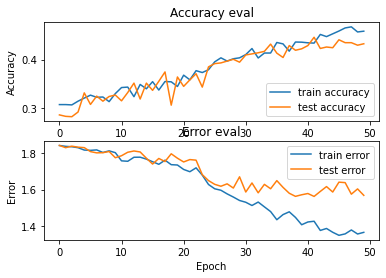

In [22]:
plot_history(history)

## CNN model

In [8]:
def prepare_dataset(test_size,validation_size):
    X,y=load_data(DATA_PATH)
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=test_size)
    X_train,X_validation,y_train,y_validation= train_test_split(X,y,test_size=validation_size)
    X_train=X_train[...,np.newaxis]
    X_validation=X_validation[...,np.newaxis]
    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [8]:
X_train,X_validation,X_test,y_train,y_validation,y_test=prepare_dataset(0.25,0.2)

Data succesfully loaded!


In [11]:
def build_model(input_shape):
    
    model = keras.Sequential()
    
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(9, activation='softmax'))

    return model

In [13]:
input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
model=build_model(input_shape)
optimiser=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
113/113 [==============================] - 8s 72ms/step - loss: 2.2923 - accuracy: 0.2526 - val_loss: 1.8182 - val_accuracy: 0.3256
Epoch 2/30
113/113 [==============================] - 9s 76ms/step - loss: 1.7673 - accuracy: 0.3874 - val_loss: 1.5582 - val_accuracy: 0.4444
Epoch 3/30
113/113 [==============================] - 7s 63ms/step - loss: 1.5571 - accuracy: 0.4400 - val_loss: 1.4126 - val_accuracy: 0.4944
Epoch 4/30
113/113 [==============================] - 8s 68ms/step - loss: 1.4120 - accuracy: 0.4906 - val_loss: 1.3161 - val_accuracy: 0.5189
Epoch 5/30
113/113 [==============================] - 9s 76ms/step - loss: 1.3116 - accuracy: 0.5161 - val_loss: 1.2567 - val_accuracy: 0.5422
Epoch 6/30
113/113 [==============================] - 7s 65ms/step - loss: 1.2540 - accuracy: 0.5481 - val_loss: 1.2082 - val_accuracy: 0.5556
Epoch 7/30
113/113 [==============================] - 7s 64ms/step - loss: 1.1661 - accuracy: 0.5753 - val_loss: 1.1738 - val_accuracy: 0.5567

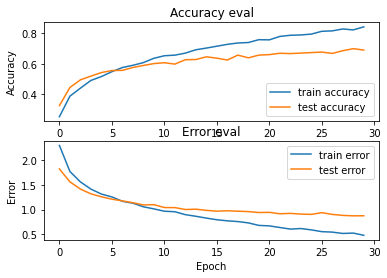

In [17]:
plot_history(history)

## RNN and LSTM

In [6]:
def prepare_dataset(test_size,validation_size):
    X,y=load_data(DATA_PATH)
    X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=test_size)
    X_train,X_validation,y_train,y_validation= train_test_split(X,y,test_size=validation_size)
    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [7]:
def build_model(input_shape):
    
    model = keras.Sequential()
    
    model.add(keras.layers.LSTM(64,input_shape=input_shape,return_sequences=True))
    model.add(keras.layers.LSTM(64))
    
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    
    model.add(keras.layers.Dense(9, activation='softmax'))
    return model

In [9]:
input_shape=(X_train.shape[1],X_train.shape[2])
model=build_model(input_shape)
optimiser=keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
113/113 [==============================] - 25s 221ms/step - loss: 2.1477 - accuracy: 0.1748 - val_loss: 2.0734 - val_accuracy: 0.2478
Epoch 2/30
113/113 [==============================] - 21s 183ms/step - loss: 2.0222 - accuracy: 0.2846 - val_loss: 1.9203 - val_accuracy: 0.3622
Epoch 3/30
113/113 [==============================] - 17s 154ms/step - loss: 1.8485 - accuracy: 0.3663 - val_loss: 1.7223 - val_accuracy: 0.3922
Epoch 4/30
113/113 [==============================] - 16s 145ms/step - loss: 1.7042 - accuracy: 0.3966 - val_loss: 1.5931 - val_accuracy: 0.4356
Epoch 5/30
113/113 [==============================] - 17s 147ms/step - loss: 1.6226 - accuracy: 0.4141 - val_loss: 1.5180 - val_accuracy: 0.4444
Epoch 6/30
113/113 [==============================] - 17s 151ms/step - loss: 1.5623 - accuracy: 0.4314 - val_loss: 1.4771 - val_accuracy: 0.4600
Epoch 7/30
113/113 [==============================] - 17s 148ms/step - loss: 1.5154 - accuracy: 0.4511 - val_loss: 1.4449 - val_ac

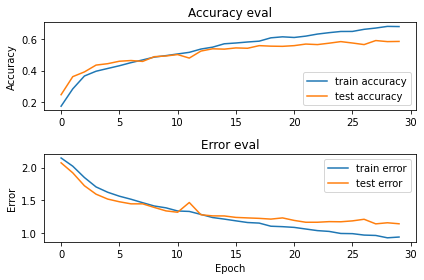

In [15]:
plot_history(history)

In [32]:
def predict(model, X, y):
    X = X[np.newaxis, ...] 
    prediction = model.predict(X)
    predicted_index = np.argmax(prediction, axis=1)
    print("Target: {}, Predicted label: {}".format(y, predicted_index))

In [33]:
X_to_predict = X_test[100]
y_to_predict = y_test[100]

predict(model, X_to_predict, y_to_predict)

Target: 3, Predicted label: [3]
